# Cardtonic Twitter Sentiment Analysis

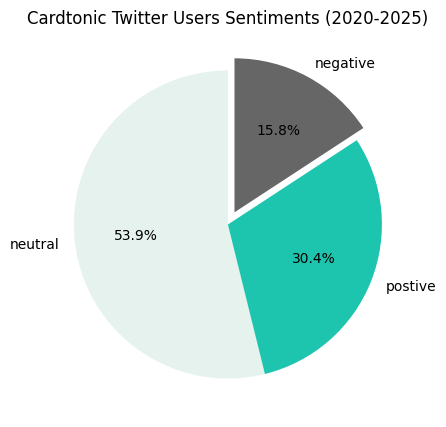

In [71]:
# Plotting a pie chart to show distribution of Sentiments
plt.figure(figsize=[7,5], facecolor='none')
plt.pie(tweets_df['sentiment'].value_counts(), labels=['neutral','postive', "negative"], colors=['#E6f2ee', '#1dc5af', '#666666'], startangle=90, explode= [0,0,0.09], autopct='%1.1f%%');
plt.title('Cardtonic Twitter Users Sentiments (2020-2025)');

**Observation**: Between 2020 and 2025, 53.9% of tweets about Cardtonic are neutral, 30.4% are positive, and 15.8% are negative.

### Creating word cloud

**Observation**: The word cloud reveals the most frequent words in the tweets. "Cardtonic" is the subject matter, accompanied by other positive/neutral words such as thank, "gift card," money, people etc.

### Create Average Monthly Sentiment Analysis

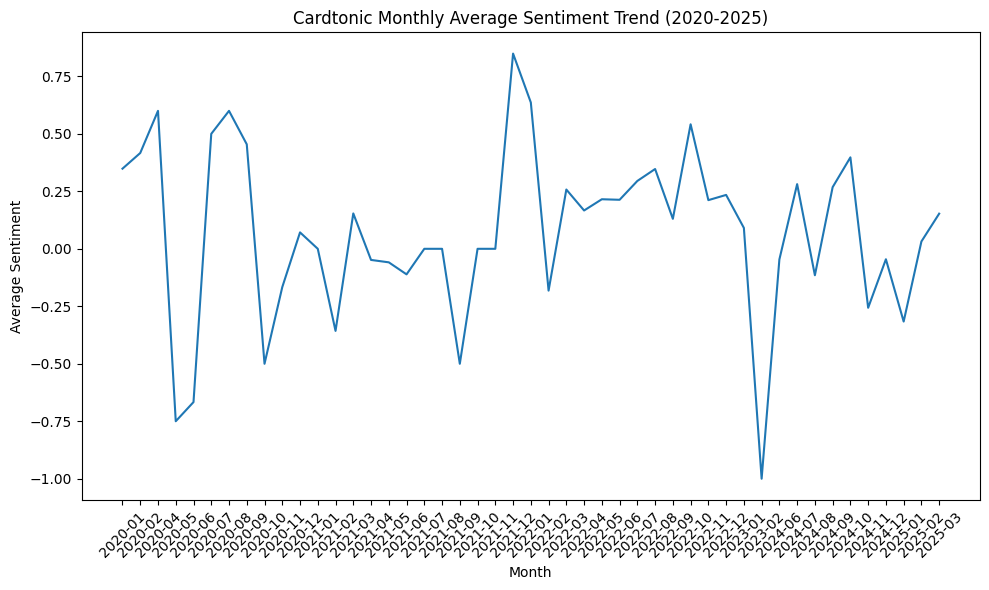

In [84]:
# Extract month-year and group by it

tweets_df["date"] = pd.to_datetime(tweets_df["date"])

# This creates a new column in 'YYYY-MM' format
tweets_df['month_year'] = tweets_df['date'].dt.to_period('M').astype(str)
# Group by month and compute the average sentiment for each month
monthly_sentiment = tweets_df.groupby('month_year')['polarity'].mean().reset_index()

# Create a figure and axis
fig, ax = plt.subplots(figsize=(10, 6))

# Plot the monthly trend using Seaborn
sns.lineplot(data=monthly_sentiment, x='month_year', y='polarity', ax=ax)
plt.title('Cardtonic Monthly Average Sentiment Trend (2020-2025)')
plt.xlabel('Month')
plt.ylabel('Average Sentiment')

plt.xticks(rotation=45)  # Rotate x labels for readability
plt.tight_layout()      # Adjust layout if necessary
plt.show()

**Observation**: The chart displays monthly average sentiment trend since 2020-2025. The sentiment polarity ranges from -1 to 1 (where Negative=-1, Neutral=0 and Positive=1). November 2021 reached the highest positive sentiment, while January 2023 registered the most negative sentiment. Recent tweets show a moderate overall polarity.

### The top issues customers face (e.g., transaction failures, limits, blocked cards)

In [76]:
negative_df = tweets_df[tweets_df['sentiment'] == 'negative']

In [78]:
# Set the max column width to None to display the full text
pd.set_option('display.max_colwidth', None)

negative_df[['sentiment','confidence','tweet']].head()

,sentiment,confidence,tweet
41,negative,0.492145,it is better you reply my dm before i send proof to verydarkman and get justice and nigeria will stop trading with you
42,negative,0.934781,you guys ripped me
44,negative,0.526989,there rates are way better than infact i had to deactivate and delete the chipper app greedy bastards
47,negative,0.536261,you guys should work on your app ona dey take forever to pay and e no sharp
49,negative,0.897855,theyre very slow in trading and payments


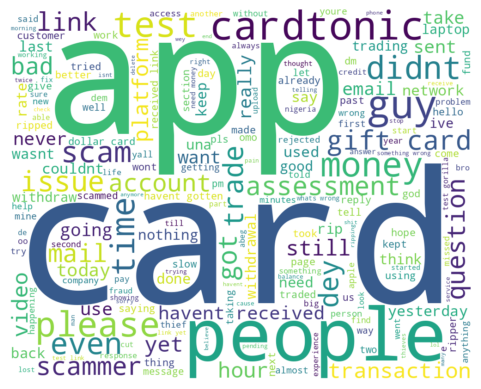

In [79]:
#Creating the text variable
text = " ".join(i for i in negative_df.cleaned_words)

wc = WordCloud(width = 1000, height = 800, background_color = "white").generate(text)

#Remove axis and display the data as image
plt.axis("off")
plt.imshow(wc, interpolation = "bilinear")

**Observation**: A significant number of negative tweets highlight issues with the app, card, account, and timing. This suggests that the app needs a thorough evaluation and subsequent updates to enhance the user experience. Also, the sales and customer service teams must respond promptly to customer concerns. Negative remarks featuring words such as "scam," "scammer," or "bad" should be addressed immediately to restore customer confidence in Cardtonic.

### Cardtonic common positive themes

In [80]:
positive_df = tweets_df[tweets_df['sentiment'] == 'positive']

In [81]:
positive_df[['sentiment','confidence','tweet']].head()

,sentiment,confidence,tweet
0,positive,0.793052,let your face shine upon me
5,positive,0.952267,god bless you abundantly sir
7,positive,0.970248,cardtonic is great
8,positive,0.872880,stay blessed
9,positive,0.817794,wowamazing


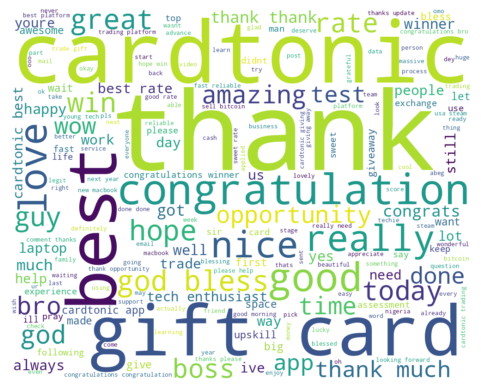

In [82]:
#Creating the text variable
text = " ".join(i for i in positive_df.cleaned_words)

wc = WordCloud(width = 1000, height = 800, background_color = "white").generate(text)

#Remove axis and display the data as image
plt.axis("off")
plt.imshow(wc, interpolation = "bilinear")

**Observation:** Most of positive tweets made reference to the Appreciative words like thank, best, congratulations. This might be influenced by Customer reward programs,  excellent customer service, promotional giveaway, etc  

In [1]:
import re

def remove_markdown(text: str) -> str:
    """
    Removes common Markdown tags from the input text.
    
    Parameters:
        text (str): The Markdown-formatted string.
        
    Returns:
        str: The plain text with Markdown tags removed.
    """
    # Remove markdown headers (e.g., # Header)
    text = re.sub(r'^\s*#{1,6}\s+', '', text, flags=re.MULTILINE)
    
    # Remove bold and italic markers (e.g., **bold**, __bold__, *italic*, _italic_)
    text = re.sub(r'(\*\*|__)(.*?)\1', r'\2', text)
    text = re.sub(r'(\*|_)(.*?)\1', r'\2', text)
    
    # Remove inline code markers (e.g., `code`)
    text = re.sub(r'`([^`]*)`', r'\1', text)
    
    # Remove markdown links (e.g., [text](url))
    text = re.sub(r'\[([^\]]+)\]\([^)]+\)', r'\1', text)
    
    # Remove markdown images (e.g., ![alt](url))
    text = re.sub(r'!\[([^\]]*)\]\([^)]+\)', r'\1', text)
    
    # Remove blockquotes (e.g., > quote)
    text = re.sub(r'^\s*>+\s*', '', text, flags=re.MULTILINE)
    
    # Remove unordered list markers (-, *, +)
    text = re.sub(r'^\s*([-*+])\s+', '', text, flags=re.MULTILINE)
    
    # Remove ordered list markers (e.g., 1. )
    text = re.sub(r'^\s*\d+\.\s+', '', text, flags=re.MULTILINE)
    
    return text

# Example usage:
if __name__ == "__main__":
    markdown_text = """
    # Header 1
    ## Header 2

    This is a paragraph with **bold text** and *italic text*.

    Here is a [link](http://example.com) and an image: ![alt text](image.png).

    > This is a blockquote.

    - List item 1
    - List item 2

    1. First item
    2. Second item

    Inline code: `print("Hello World")`
    """

    cleaned_text = remove_markdown(markdown_text)
    print(cleaned_text)


Header 1
Header 2

    This is a paragraph with bold text and italic text.

    Here is a link and an image: !alt text.
This is a blockquote.
List item 1
List item 2
First item
Second item

    Inline code: print("Hello World")
    


In [3]:
import re

def remove_markdown(text: str) -> str:
    """
    Removes common Markdown tags from the input text, but retains link and image info.
    
    Specifically, this function:
    - Removes headers, emphasis, inline code, blockquotes, and list markers.
    - Converts links from [text](url) to "text (url)".
    - Converts images from ![alt text](url) to "alt text (url)".
    
    Parameters:
        text (str): The Markdown-formatted string.
        
    Returns:
        str: The plain text with most Markdown tags removed, retaining link and image details.
    """
    # Remove markdown headers (e.g., # Header)
    text = re.sub(r'^\s*#{1,6}\s+', '', text, flags=re.MULTILINE)
    
    # Remove bold and italic markers (e.g., **bold**, *italic*)
    text = re.sub(r'(\*\*|__)(.*?)\1', r'\2', text)
    text = re.sub(r'(\*|_)(.*?)\1', r'\2', text)
    
    # Remove inline code markers (e.g., `code`)
    text = re.sub(r'`([^`]*)`', r'\1', text)
    
    # Convert markdown links [text](url) -> "text (url)"
    text = re.sub(r'\[([^\]]+)\]\(([^)]+)\)', r'\1 (\2)', text)
    
    # Convert markdown images ![alt text](url) -> "alt text (url)"
    text = re.sub(r'!\[([^\]]*)\]\(([^)]+)\)', r'\1 (\2)', text)
    
    # Remove blockquotes markers (e.g., > quote)
    text = re.sub(r'^\s*>+\s*', '', text, flags=re.MULTILINE)
    
    # Remove unordered list markers (-, *, +)
    text = re.sub(r'^\s*([-*+])\s+', '', text, flags=re.MULTILINE)
    
    # Remove ordered list markers (e.g., 1. )
    text = re.sub(r'^\s*\d+\.\s+', '', text, flags=re.MULTILINE)
    
    return text

# Example usage:
if __name__ == "__main__":
    markdown_text = """
   ### **Interview Questions & Answers for Automation Specialist Role**

---

#### **1. Technical Support & Troubleshooting**  
**Question:**  
*"Describe a time when you resolved a critical technical issue in an automation workflow. What steps did you take, and how did you ensure minimal disruption to operations?"*  

**What Interviewer Wants:** Problem-solving skills, prioritization, communication, and technical expertise.  
**Sample Answer:**  
"In a previous role, an automated lead-generation workflow in Zapier suddenly stopped syncing data to HubSpot. I first isolated the issue by checking error logs and API connections, discovering a rate limit exceeded error due to a surge in leads. I paused the workflow to prevent data loss, created a temporary Google Sheet to log incoming leads, and adjusted the Zapier trigger intervals to comply with API limits. After restoring the workflow, I communicated the fix to the sales team and added monitoring alerts to prevent recurrence. Downtime was limited to 2 hours, and no leads were lost."  

---

#### **2. Automation & Integration**  
**Question:**  
*"Walk me through a complex automation project you designed. Which tools did you use, and how did you ensure seamless integration between platforms?"*  

**What Interviewer Wants:** Hands-on experience with tools like Make/Zapier, integration strategies, and outcome-focused thinking.  
**Sample Answer:**  
"I automated a client onboarding process where data from HubSpot forms needed to sync with Google Sheets, trigger personalized emails via Gmail, and update a MySQL database. Using Make (Integromat), I built a scenario that parsed form submissions, validated data with conditional logic, and handled errors by rerouting incomplete entries to a Slack channel for manual review. I tested edge cases (e.g., duplicate entries) and documented the workflow for the team. This reduced onboarding time by 40% and eliminated manual data entry."  

---

#### **3. Data Reporting**  
**Question:**  
*"How would you design a Looker Studio dashboard to track marketing campaign performance across HubSpot, Google Analytics, and social media platforms?"*  

**What Interviewer Wants:** Data visualization skills, understanding of cross-platform integration, and alignment with business goals.  
**Sample Answer:**  
"I’d start by identifying KPIs like conversion rates, cost per lead, and ROI. Using Looker Studio’s connectors, I’d blend data from HubSpot (lead data), Google Analytics (website traffic), and social APIs (ad spend). To ensure accuracy, I’d create calculated fields for metrics like ROI and set up automated data refreshes. The dashboard would include filters for date ranges and campaigns, with visualizations like trend charts and goal progress bars. I’d collaborate with marketing to validate requirements and iterate based on feedback."  

---

#### **4. Cross-Functional Collaboration**  
**Question:**  
*"Give an example of how you worked with a non-technical team to identify automation opportunities. How did you bridge the communication gap?"*  

**What Interviewer Wants:** Collaboration, communication, and translating business needs into technical solutions.  
**Sample Answer:**  
"The finance team manually reconciled invoices from 3 platforms, causing delays. I scheduled workshops to map their process, asking questions like, ‘Which steps take the most time?’ and ‘Where do errors usually occur?’ I explained automation possibilities in simple terms, like using Make to auto-import CSV files into Google Sheets and flag discrepancies. Post-implementation, I trained them on the tool and provided cheat sheets. This cut reconciliation time by 70% and improved interdepartmental trust."  

---

#### **5. Tool Evaluation & Implementation**  
**Question:**  
*"How do you evaluate and select a new automation tool for a business need? Share a time when you led such an initiative."*  

**What Interviewer Wants:** Analytical skills, decision-making, and project leadership.  
**Sample Answer:**  
"When our sales team needed a CRM-PPC integration, I created a scoring matrix comparing Zapier, Make, and custom APIs. Criteria included cost, scalability, ease of use, and API limits. I built a proof of concept in Make to sync HubSpot deals with Google Ads budgets, demonstrating ROI in a pilot. After selecting Make, I trained the team and documented use cases. The tool reduced manual budget adjustments by 90%."  

---

#### **6. Security & Compliance**  
**Question:**  
*"How do you ensure security and compliance when automating data flows between platforms like HubSpot and MySQL?"*  

**What Interviewer Wants:** Security awareness, attention to compliance, and technical safeguards.  
**Sample Answer:**  
"I follow the principle of least privilege, ensuring API keys and credentials have restricted access. For example, when integrating HubSpot with MySQL, I used OAuth for authentication and encrypted sensitive fields like customer emails. I also scheduled quarterly audits to review access permissions and ensured GDPR compliance by anonymizing data in test environments. Additionally, I collaborated with the legal team to document data flow mappings."  

---

#### **7. Documentation & Knowledge Sharing**  
**Question:**  
*"How do you create documentation that is accessible to both technical and non-technical stakeholders?"*  

**What Interviewer Wants:** Clarity, user-centric communication, and process transparency.  
**Sample Answer:**  
"I structure documentation into sections: overview (for leadership), step-by-step guides (for users), and technical specs (for developers). For a recent HubSpot workflow, I included screenshots, a troubleshooting FAQ, and a short Loom video demo. During onboarding, I conducted a workshop and encouraged feedback to refine the materials. This reduced follow-up questions by 60%."  

---

#### **8. Adaptability & Continuous Improvement**  
**Question:**  
*"How do you stay updated with automation trends, and how have you applied this knowledge in your work?"*  

**What Interviewer Wants:** Learning agility and proactive improvement.  
**Sample Answer:**  
"I subscribe to newsletters like Automate.io’s blog and attend webinars on AI-driven automation. Recently, I learned about ChatGPT API integration and proposed using it to auto-generate support ticket summaries in Zendesk. After testing, we reduced ticket resolution time by 25%. I also share insights monthly with my team via brown-bag sessions."  

---

### **Behavioral & General Questions**  
1. **Strengths/Weaknesses:**  
   *"I excel at translating complex workflows into simple solutions, but I sometimes over-engineer automations. I now prioritize MVP versions and iterate based on feedback."*  

2. **Why This Role?**  
   *"I’m passionate about optimizing processes at scale, and your focus on cross-departmental collaboration aligns with my experience in bridging tech and business gaps."*  

3. **Handling Deadlines:**  
   *"I break projects into milestones using Trello, communicate progress weekly, and flag risks early. For example, I delivered a GDPR-compliant data pipeline in 3 weeks by prioritizing critical path tasks."*  

---

These examples emphasize **problem-solving**, **technical depth**, and **collaboration**—key traits for an Automation Specialist. Tailor answers to your experience while aligning with the job’s focus on tools, security, and cross-functional impact.
    """

    cleaned_text = remove_markdown(markdown_text)
    print(cleaned_text)


Interview Questions & Answers for Automation Specialist Role

---
Technical Support & Troubleshooting  
Question:  
"Describe a time when you resolved a critical technical issue in an automation workflow. What steps did you take, and how did you ensure minimal disruption to operations?"  

What Interviewer Wants: Problem-solving skills, prioritization, communication, and technical expertise.  
Sample Answer:  
"In a previous role, an automated lead-generation workflow in Zapier suddenly stopped syncing data to HubSpot. I first isolated the issue by checking error logs and API connections, discovering a rate limit exceeded error due to a surge in leads. I paused the workflow to prevent data loss, created a temporary Google Sheet to log incoming leads, and adjusted the Zapier trigger intervals to comply with API limits. After restoring the workflow, I communicated the fix to the sales team and added monitoring alerts to prevent recurrence. Downtime was limited to 2 hours, and no leads we